# Team BenjaminHinaSam

## What is the best neighborhood in Pittsburgh?
Our approach to solving this is by asking "Which neighborhood is the most invariant to an alien invasion?" by examining how easy it is to <b>run away</b> from the aliens, setting up <b>shelter</b> from the aliens, and <b>defend</b> ourselves from the aliens. We wanted to explore this question because we are deathly afraid of the apocalypse happening and want to select an appropriate neighborhood when picking our future off-campus apartment locations. 

## Running Away from Aliens - Steps / Stairways

During the early moments of the Alien Invasion, it will be nescessary to be able to run from the aliens until the human resistance has formed. As aliens typically levitate, and their speeds are unaffected by changes in elevation, stairs serve as a huge detriment for fleeing humans. Having to climb a lengthy set of stairs could prove the difference between escaping a pursuing alien and being captured. Therefore, for this sub-metric, we determine the neighborhood with the least amount of stairs that would provide the best enviornment for running for your life.

In [10]:
#Loading data
import pandas as pd
import geopandas
Stairs = pd.read_csv("stepstats.csv", index_col="id")

In [2]:
#Sample some data
Stairs.sample(10)

,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,transit_rider_count,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,
1836001280,Hot Metal Bridge 1,3rd Division,NaN,Concrete,NaN,6.0,NaN,NaN,NaN,NaN,...,South Side Flats,3.0,16.0,42003160900,3.0,16.0,3.0,4-24,40.427540,-79.962162
359109323,Kent Way from 54th St to Kendall St,2nd Division,1951-01-01,Concrete,247.0,35.0,NaN,NaN,NaN,NaN,...,Upper Lawrenceville,7.0,10.0,42003101100,2.0,10.0,2.0,3-5,40.481779,-79.949011
1323791787,Dornbush St from Bricelyn St to Fahnestock St,2nd Division,1950-01-01,Concrete,410.0,NaN,1.0,2.0,603.0,30.0,...,East Hills,9.0,13.0,42003130600,2.0,13.0,5.0,3-17,40.454235,-79.878745
333607841,Allegheny Commons 1,Parks - Northern,NaN,Stone,NaN,NaN,NaN,NaN,NaN,NaN,...,Allegheny Center,1.0,22.0,42003562700,1.0,22.0,1.0,1-6,40.452124,-80.001666
2086315948,Dubois St from India St to Dickens St,5th Division,NaN,Concrete,275.0,12.0,NaN,NaN,NaN,NaN,...,Crafton Heights,2.0,20.0,42003281400,5.0,20.0,6.0,1-16,40.449963,-80.051036
1525129067,Lombard St from Colwell St to Diaz Way,3rd Division,1930-01-01,Asphalt/Concrete,114.0,25.0,0.0,100.0,674.0,199.0,...,Crawford-Roberts,6.0,3.0,42003030500,3.0,3.0,2.0,2-1,40.439175,-79.978832
876847002,S Highland Ave Bridge East,Construction,NaN,Metal,30.0,24.0,NaN,NaN,NaN,NaN,...,Shadyside,8.0,7.0,42003070800,2.0,7.0,4.0,3-11,40.458903,-79.924942
1961733621,Caperton St from Fordyce St to Conniston Ave,4th Division,1947-01-01,Concrete,357.0,57.0,NaN,NaN,NaN,NaN,...,Bon Air,4.0,18.0,42003562400,5.0,18.0,3.0,4-7,40.409656,-80.000008
233152030,Arsenal Park 8,Parks - Northeast,NaN,Stone,NaN,NaN,NaN,NaN,NaN,NaN,...,Lower Lawrenceville,7.0,6.0,42003060300,2.0,6.0,2.0,3-3,40.466812,-79.962628


In order to guarantee a successful getaway from hostile alien forces, it is important to consider the outdoor stairways found in each neighborhood. Having to climb stairs, instead of running away on flat road, could make community members more suscepitble to the effects of an alien invasion. In this notebook, we will consider both how often a neighborhood resident might encounter a stairway during their getaway and also how many stairs they will encounter on average.

Manchester             1
East Liberty           1
Larimer                1
Strip District         1
Chartiers City         1
                    ... 
Greenfield            40
Beechview             42
Perry North           47
Mount Washington      53
South Side Slopes    108
Name: neighborhood, Length: 79, dtype: int64
neighborhood
South Side Slopes     4081.0
Beechview             2473.0
Perry South           1843.0
Greenfield            1472.0
Hazelwood             1374.0
                       ...  
East Liberty             0.0
Manchester               0.0
North Shore              0.0
Point Breeze North       0.0
Regent Square            0.0
Name: number_of_steps, Length: 79, dtype: float64


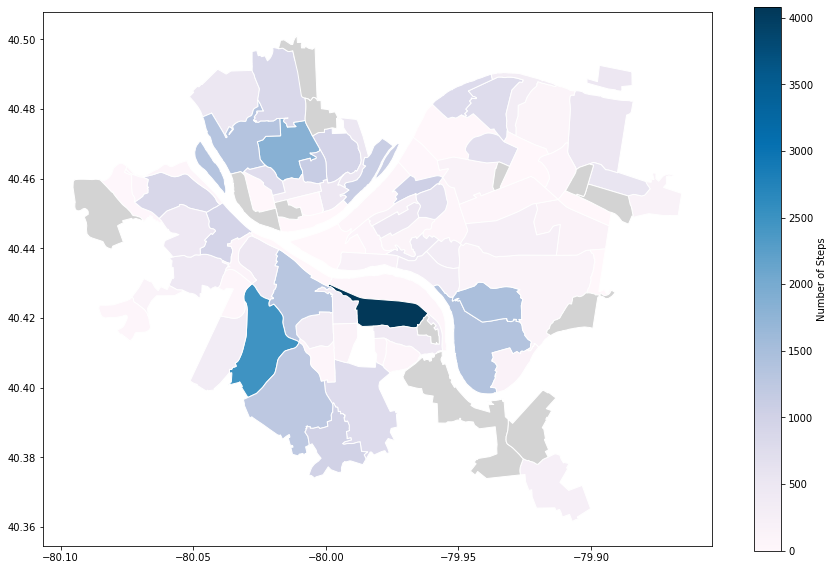

In [69]:
#First, let's view the number of stairways per community
stairList = Stairs['neighborhood'].value_counts().sort_values(ascending=True)
print(stairList)

# Map 
stairMapData = Stairs.groupby('neighborhood').sum()['number_of_steps'].sort_values(ascending=False)
print(stairMapData)

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
stairsMap = neighborhoods.merge(stairMapData, how='left', left_on='hood', right_on='neighborhood')
stairsMap.plot(column='number_of_steps', # set the data to be used for coloring
               cmap='PuBu',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Great for us and bad for the aliens, there seem to be a fair number of neighborhoods with only one recorded stairwell. Let's get a better list of which neighborhoods only include a singular stairwell.

In [4]:
#display a list of single-staired neighborhoods
low_stair_neighborhoods = Stairs.groupby('neighborhood').filter(lambda x: x['neighborhood'].value_counts() == 1)
low_stair_neighborhoods['neighborhood'].values.tolist()

['Mount Oliver Borough',
 'Strip District',
 'Chartiers City',
 'Larimer',
 'Bluff',
 'Manchester',
 'East Liberty']

Ok, so we have a list of 7 neighborhoods that all only have one documented stairwell. Since we can't have a 7 way tie, let us take a closer look at each stairwell. To start, we can view how many stairs. For the purposes of panicked fleeing from UFO's less steps are preferred.

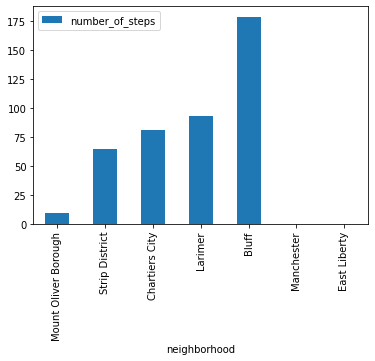

In [5]:
low_stair_neighborhoods.plot(x='neighborhood', y='number_of_steps', kind="bar")

Manchester and East Liberty aren't properly documented, so let's remove them from consideration.

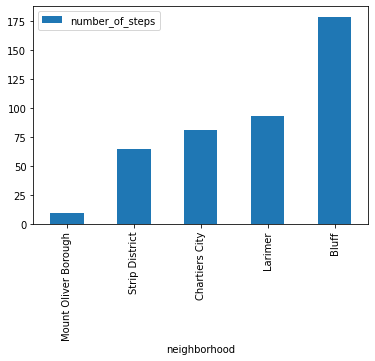

In [6]:
defined_low_stair_neighborhoods = low_stair_neighborhoods.groupby('number_of_steps').filter(lambda x: x['number_of_steps'].value_counts() != 0)
defined_low_stair_neighborhoods.plot(x='neighborhood', y='number_of_steps', kind="bar")

Mt. Oliver Borough is the clear winner for this particular metric. Let's create a query mask of Mt. Oliver to help with our conclusion.

In [7]:
mtoliver_query_mask = Stairs['neighborhood'] == "Mount Oliver Borough"
mtoliver_query = Stairs[mtoliver_query_mask]

In [8]:
print("MT. OLIVER BORO SUMMARY")
print(mtoliver_query['number_of_steps'].sum())
print(mtoliver_query['material'])

MT. OLIVER BORO SUMMARY
9.0
id
850876938    Concrete
Name: material, dtype: object


With only 9 concrete stairs to traverse, Mt. Oliver Borough is a great neighborhood for running away from the alien invasion.

While this conclusion was very impressive, as only 9 stairs in an entire neighborhood is particularly flat, there are a few limitations of this dataset that prevented me from drawing a stronger conclusion. Firstly, there were a few datapoints of entered staircases that lacked further information, particularly about number of steps. Additionally, there were some neighborhoods that lacked entries altogether. This is very suprising, and leads me to believe that the data set is not complete and wholly accurate. This could have affected my conclusion, as it is very difficult to tell which staircases were omitted and where.

## Running Away from Aliens - Speed Humps

## Speed Humps
City of Pittsburgh Speed Humps: https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps
<br> This data set lists each recorded speed hump in the city of Pittsburgh with which neighborhood they're located in.
<br> We'll find the neighborhood with the most amount of speed humps as the more speed humps there are, the more the alien's vehicle will be slowed down 

In [11]:
# Load libraries
import pandas as pd
import numpy as np
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt

In [12]:
# Load the dataset
speedBumps = pd.read_csv("speedBumps.csv")
speedBumps.sample(10)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
39,905381373,40,NaN,Boundary St,4523,NaN,North Oakland,8,14,42003140100,3,14,4,2-8,40.443192,-79.947667
7,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
13,659399120,18,233.0,Edmond St,11675,Asphalt,Bloomfield,7,8,42003080900,2,8,5,3-6,40.464244,-79.947628
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
57,2078095266,58,1281.0,Parkview Blvd,19227,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.420633,-79.914065
28,769108618,29,7444.0,Finance St,2949,Asphalt,Homewood South,9,13,42003130300,2,13,5,3-17,40.451609,-79.894949
51,651962943,52,2264.0,Spokane St,11533,Asphalt,Carrick,4,29,42003290400,3,29,3,4-23,40.388998,-79.989797
18,1987150310,23,3807.0,Melwood Ave,14629,Asphalt,Polish Hill,7,6,42003060500,6,6,2,2-6,40.460057,-79.957110
66,1237386520,67,2512.0,Mission St,15541,Asphalt,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.422768,-79.971155


First, let's see which neighborhoods have speed humps listed in the data set

In [13]:
speedBumpsneighborhoods = speedBumps['neighborhood'].unique()
print(speedBumpsneighborhoods)
len(speedBumpsneighborhoods)

['Squirrel Hill South' 'North Oakland' 'Brookline' 'Bloomfield'
 'Polish Hill' 'Homewood South' 'Mount Washington' 'South Side Flats'
 'Central Oakland' 'Squirrel Hill North' 'Upper Hill' 'Highland Park'
 'Carrick' 'Perry North' 'South Side Slopes' 'Garfield' 'Stanton Heights'
 'Overbrook']


18

We have 18 neighborhoods listed in the dataset.

Now let's count the speed humps that each neighborhood has:

Squirrel Hill South    18
Carrick                 9
North Oakland           6
Polish Hill             6
Perry North             4
Homewood South          4
Upper Hill              4
Brookline               4
South Side Slopes       4
Squirrel Hill North     3
Mount Washington        3
Garfield                3
Bloomfield              3
South Side Flats        3
Highland Park           2
Stanton Heights         1
Overbrook               1
Central Oakland         1
Name: neighborhood, dtype: int64


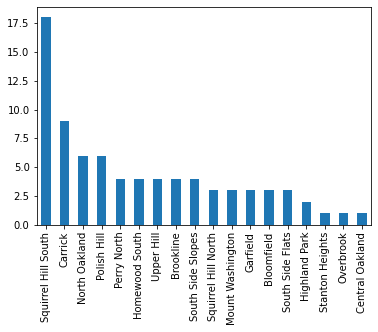

In [14]:
speedBumpsPerNeighborhood = speedBumps['neighborhood'].value_counts()
print(speedBumpsPerNeighborhood)
speedBumpsPerNeighborhood.plot(x='Neighborhoods in Pittsburgh', y='Number of Speedbumps', kind='bar')

It looks like with this metric, Squirrel Hill South is the best neighborhood to be in when aliens are chasing you :D

## Setting up Shelter from Aliens - Field Area

City of Pittsburgh Playing Fields: https://data.wprdc.org/dataset/playing-fields
<br>This data set lists each recorded playing field in the city of Pittsburgh with which neighborhood they're located in and the field measurements of each.
<br>We'll find the neighborhood with the most amount of playing field area as the more fields there are, the more potential places to set up shelter after the buildings are destroyed by the aliens.   

In [15]:
# Load the dataset
playingFields = pd.read_csv("playingFields.csv")
playingFields.head(10)

,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,right_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,290.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,122.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,150.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,373.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,185.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870
5,491692062,Bigbee,f,Emerald View Park - Bigbee Field Park,Rectangular Only,0,NaN,NaN,NaN,NaN,...,Allentown,3,18,42003180300,5,18,3,4-5,40.427849,-80.001223
6,332143201,Bill Stoltz,t,Arlington Park,Diamond Only,0,Skinned,210.0,250.0,240.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418624,-79.974959
7,800768920,Brighton Heights Field 1,f,Brighton Heights Park,Diamond Only,0,Skinned,170.0,170.0,170.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.488582,-80.033072
8,742572488,Brighton Heights Field 2,f,Brighton Heights Park,Diamond Only,0,Skinned,260.0,375.0,252.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.488152,-80.032783
9,183023484,Brighton Heights Field 3 - John Merry,f,Brighton Heights Park,Diamond Only,0,Skinned,310.0,333.0,327.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.487739,-80.032533


First, let's see which neighborhoods have fields listed in the data set

In [16]:
playingFieldsneighborhoods = playingFields['neighborhood'].unique()
print(playingFieldsneighborhoods)
len(playingFieldsneighborhoods)

['South Side Slopes' 'South Side Flats' 'Lower Lawrenceville' 'Banksville'
 'Allentown' 'Brighton Heights' 'Hazelwood' 'Lincoln-Lemington-Belmar'
 'Windgap' 'Troy Hill' 'South Oakland' 'Brookline' 'Arlington'
 'Mount Washington' 'Crafton Heights' 'East Hills' 'East Liberty'
 'Highland Park' 'Squirrel Hill South' 'Upper Lawrenceville' 'Fineview'
 'Regent Square' 'Garfield' 'Perry South' 'Perry North' 'Elliott'
 'Beechview' 'Morningside' 'Central Lawrenceville' 'Bedford Dwellings'
 'Terrace Village' 'Larimer' 'Beltzhoover' 'Greenfield' 'Manchester'
 'Allegheny Center' 'Central Oakland' 'Lincoln Place' 'Sheraden'
 'Shadyside' 'Spring Garden' 'Oakwood' 'Stanton Heights' 'Carrick'
 'Marshall-Shadeland' 'Spring Hill-City View' 'West End' 'Polish Hill'
 'Westwood' 'Squirrel Hill North' 'Homewood South']


51

We have 51 neighborhoods listed in the dataset.

To calculate the area for each field, we can approxinate it by multiplying the left field distance and right field distance

<br>https://forum.wordreference.com/threads/down-the-left-field-line-baseball.3351745/

![field](baseballfield.jpg)

We'll loop through the data set and extract out the neighborhood and area of each field. To calculate the area, we multiply the left field distance and right field distance and make a new quality called "fieldArea"

In [17]:
sizeOfFields_info_dictionary = {'width':playingFields.left_field_distance, 'length':playingFields.right_field_distance, 'neighborhood':playingFields.neighborhood}
sizeofFields = pd.DataFrame(sizeOfFields_info_dictionary)

# calculate the area 
area = []
for index, row in sizeofFields.iterrows():
    fieldWidth = row['width']
    fieldLength = row['length']
    neighborhoodName = row['neighborhood']
    calculation = fieldWidth * fieldLength 
    area.append({'neighborhood':neighborhoodName, 'fieldArea':calculation}) 
fieldAreas = pd.DataFrame(area)
fieldAreas

,neighborhood,fieldArea
0,South Side Slopes,46400.0
1,South Side Flats,29280.0
2,Lower Lawrenceville,20250.0
3,Banksville,113392.0
4,Banksville,33300.0
...,...,...
109,Westwood,57600.0
110,Squirrel Hill North,44756.0
111,Homewood South,82125.0
112,South Side Slopes,37950.0


Since we have the area for each field, we'll sum up the area of all the fields for each neighborhood!

neighborhood
Brighton Heights            339082.0
Brookline                   229900.0
South Side Slopes           219300.0
Regent Square               205136.0
Shadyside                   200270.0
Carrick                     193480.0
Highland Park               182629.0
Morningside                 176605.0
Mount Washington            175750.0
Greenfield                  155165.0
Troy Hill                   153106.0
Crafton Heights             147125.0
Banksville                  146692.0
Beltzhoover                 141650.0
Elliott                     141250.0
Sheraden                    139800.0
Lower Lawrenceville         135201.0
Westwood                    122489.0
Terrace Village             122425.0
Allegheny Center            121200.0
Spring Hill-City View       120050.0
Bedford Dwellings           118800.0
Beechview                   117175.0
Windgap                     114375.0
Central Lawrenceville       114100.0
Hazelwood                   107379.0
Polish Hill              

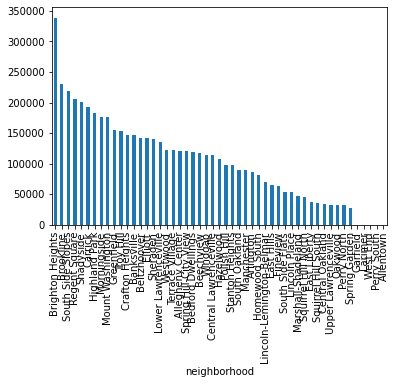

In [18]:
areaOfFieldsPerNeighborhood = fieldAreas.groupby('neighborhood').sum()['fieldArea'].sort_values(ascending=False)
print(areaOfFieldsPerNeighborhood)
areaOfFieldsPerNeighborhood.plot(x='Neighborhoods in Pittsburgh', y='Number of Speedbumps', kind='bar')

Let's put it on a map to see it visually!

In [19]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
fieldArea = neighborhoods.merge(areaOfFieldsPerNeighborhood, how='left', left_on='hood', right_on='neighborhood')

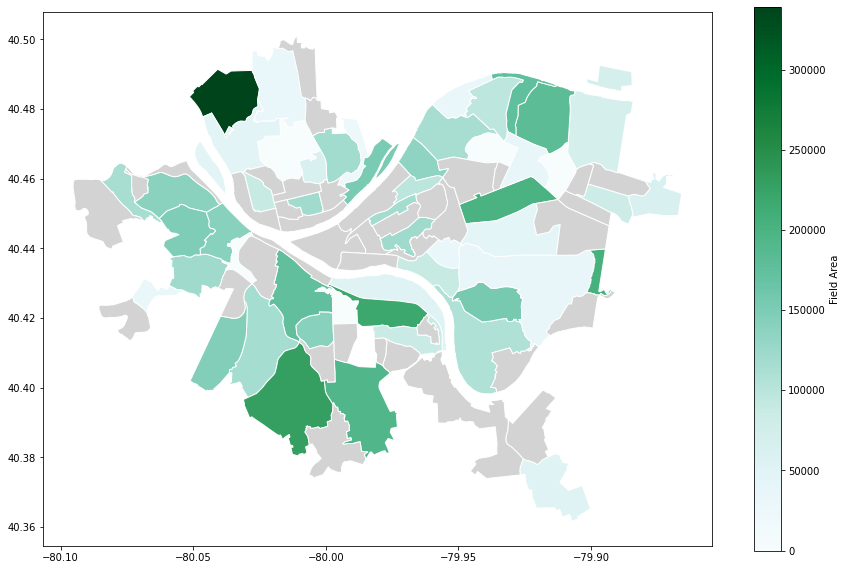

In [33]:
fieldArea.plot(column='fieldArea', # set the data to be used for coloring
               cmap='BuGn',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Field Area"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

It looks like with this metric, Brighton Heights is the best neighborhood to be in when trying to set up camp from aliens!

We can see from the data analysis that the drawbacks to the data is that there are only 18 neighborhoods that have speed humps recorded in the dataset versus 51 that have recorded playing fields. This means that there are 33 neighborhoods that had to be cut in order to combine the metrics since it wouldn't be fair to add them together with some not having a speed hump metric. Additioanlly, having speed humps doesn't mean that it's easier to run away from aliens as they could come on flying saucers instead of land vehicles. 

## Defending Ourselves from Aliens - Gun Seizures

In an alien invasion, there may come a time where the only option is to defend yourself. In a situation like this, you would want to find yourself in the neighborhood with the most guns. A neighborhood with many guns would last longer in an alien invasion than a neighborhood with very few guns. Heading to a neighborhood with a lot of guns would give you a better chance of fighting back. This metric of gun seizures in each neighborhood gives us a good idea of what neigborhoods contain the most guns.

In [21]:
# Importing the Data
import pandas as pd
import geopandas

%matplotlib inline

data = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

<b>Analyzing the Data</b>

To find out which neighborhood has the most guns seized, we will loop through the dataset and grab each neighborhood's total guns seized. Then we will order them so the neighborhood with the most guns seized appear first and the neighborhood with the least appears at the bottom. Then we will graph that same data to see it visually.

neighborhood
Homewood South               300
South Side Flats             174
Homewood North               146
East Liberty                 140
Carrick                      133
Hazelwood                    131
Brighton Heights             130
Marshall-Shadeland           124
Lincoln-Lemington-Belmar     123
Perry South                  119
Larimer                      116
Central Business District    111
East Hills                   109
Sheraden                     107
Knoxville                     95
Middle Hill                   85
Garfield                      83
Allentown                     83
Mount Washington              81
Beechview                     79
Name: total_count, dtype: int64


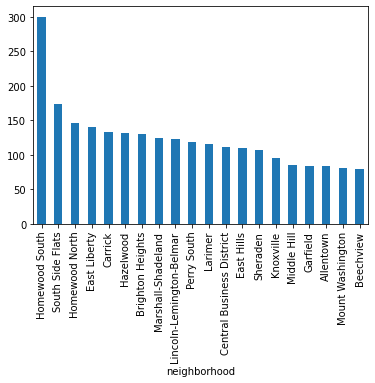

In [22]:
loc_totals = data.groupby("neighborhood").sum()["total_count"]
loc_totals.sort_values(ascending=False).head(20).plot(kind="bar")
print(loc_totals.sort_values(ascending=False).head(20))

<b>Map of Guns Seized in Each Neighborhood</b>

In order to get a better picture of where all the neighborhoods stand, we can use a map. A map is also handy so we would know the location of all the good neighborhoods so we can find our way there.

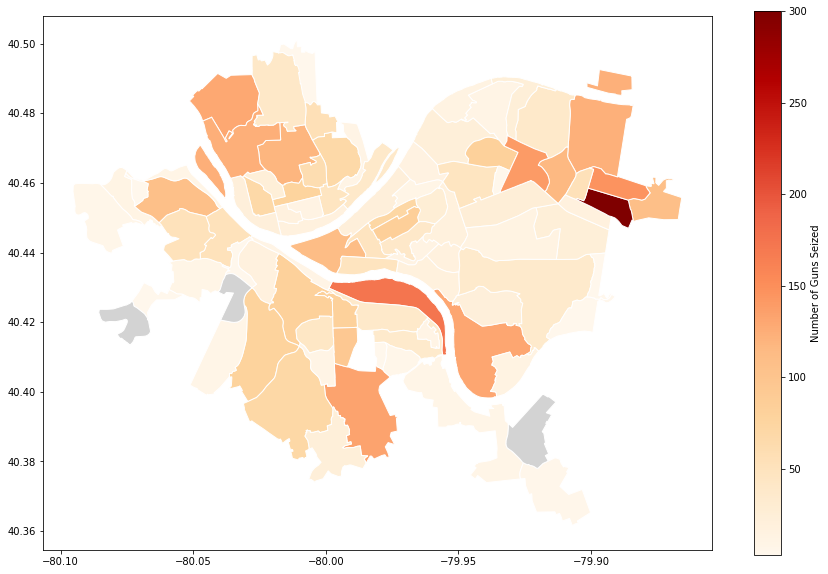

In [23]:
guns_map = neighborhoods.merge(loc_totals, how='left', left_on='hood', right_on='neighborhood')
guns_map.plot(column='total_count', cmap='OrRd', edgecolor="white", legend=True,
              legend_kwds={'label': "Number of Guns Seized"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

<b>Map of Neighborhoods</b>

![map](map.png)

From the bar chart and the map, we can see Homewood South is the best neighborhood as it has the most gun seizures

Although this data gives us a good idea, it may not be a completely accurate representation of what neighborhoods have the most guns. There could be many factors that would lead to reality being different from this data, such as a certain neighborhood having a high number of people who own guns legally, and therefore don't get seized. There could also be neighborhoods where more people get away with having guns illegally. That being said, this data tells us that there is likely a lot of guns in Homewood South.

## Combining Metrics

Now that we have all of our data analysis done, we need to combine our metrics: 
<br>Steps / Stairways: The less the better 
<br>Speed Humps: The more the better 
<br>Field Area: The more the better 
<br>Gun Seizures: The more the better

Now we're going to normalize the metric from the highest one so that we can add the metrics with equal weight. We'll store them in a dictionary with the key being the neighborhood name and the value being the normalized metric. For the stairs, we'll make it (1 - (normalized)) so that the less steps there are, the better it is for the humans to run away. 

In [25]:
# Normalizing Steps / Stairs 
stepsLIST = (Stairs['neighborhood'].value_counts().sort_values(ascending=True)).reset_index().values.tolist()
normalizedSteps = {}
highestSteps = 108
for s in stepsLIST:
    normalizedSteps[s[0]] = 1 - (s[1] / highestSteps)
print(normalizedSteps)

{'Mount Oliver Borough': 0.9907407407407407, 'Larimer': 0.9907407407407407, 'Manchester': 0.9907407407407407, 'Chartiers City': 0.9907407407407407, 'East Liberty': 0.9907407407407407, 'Bluff': 0.9907407407407407, 'Strip District': 0.9907407407407407, 'Windgap': 0.9814814814814815, 'Glen Hazel': 0.9814814814814815, 'East Carnegie': 0.9814814814814815, 'Central Business District': 0.9814814814814815, 'St. Clair': 0.9814814814814815, 'Point Breeze North': 0.9814814814814815, 'Shadyside': 0.9814814814814815, 'South Shore': 0.9814814814814815, 'Bon Air': 0.9814814814814815, 'North Shore': 0.9814814814814815, 'Ridgemont': 0.9722222222222222, 'Esplen': 0.9722222222222222, 'Central Northside': 0.9722222222222222, 'Crawford-Roberts': 0.9722222222222222, 'North Oakland': 0.962962962962963, 'Regent Square': 0.962962962962963, 'East Allegheny': 0.962962962962963, 'Allegheny Center': 0.9537037037037037, 'South Side Flats': 0.9537037037037037, 'Central Oakland': 0.9537037037037037, 'Oakwood': 0.9537

In [26]:
# Normalizing Speed Humps
speedBumpsPerNeighborhoodLIST = speedBumpsPerNeighborhood.reset_index().values.tolist()
normalizedSpeedBumps = {} 
highestSpeedBump = 18
for i in speedBumpsPerNeighborhoodLIST:
    normalizedSpeedBumps[i[0]] = i[1] / highestSpeedBump    
print(normalizedSpeedBumps)

{'Squirrel Hill South': 1.0, 'Carrick': 0.5, 'North Oakland': 0.3333333333333333, 'Polish Hill': 0.3333333333333333, 'Perry North': 0.2222222222222222, 'Homewood South': 0.2222222222222222, 'Upper Hill': 0.2222222222222222, 'Brookline': 0.2222222222222222, 'South Side Slopes': 0.2222222222222222, 'Squirrel Hill North': 0.16666666666666666, 'Mount Washington': 0.16666666666666666, 'Garfield': 0.16666666666666666, 'Bloomfield': 0.16666666666666666, 'South Side Flats': 0.16666666666666666, 'Highland Park': 0.1111111111111111, 'Stanton Heights': 0.05555555555555555, 'Overbrook': 0.05555555555555555, 'Central Oakland': 0.05555555555555555}


In [27]:
# Normalizing Field Area
areaOfFieldsPerNeighborhoodLIST = areaOfFieldsPerNeighborhood.reset_index().values.tolist()
normalizedareaOfFields = {}
highestArea = 339082.0
for i in areaOfFieldsPerNeighborhoodLIST:
    normalizedareaOfFields[i[0]] = i[1] / highestArea    
print(normalizedareaOfFields)

{'Brighton Heights': 1.0, 'Brookline': 0.6780070897305077, 'South Side Slopes': 0.6467462147799058, 'Regent Square': 0.6049746079119505, 'Shadyside': 0.5906240968261365, 'Carrick': 0.5705994420228735, 'Highland Park': 0.5385983331465545, 'Morningside': 0.5208327189293446, 'Mount Washington': 0.5183112049592724, 'Greenfield': 0.4576031756330327, 'Troy Hill': 0.45153089813083563, 'Crafton Heights': 0.43389209689691577, 'Banksville': 0.4326151196465752, 'Beltzhoover': 0.41774556007101527, 'Elliott': 0.41656590441250196, 'Sheraden': 0.41228965265039136, 'Lower Lawrenceville': 0.3987265617166349, 'Westwood': 0.3612371048890829, 'Terrace Village': 0.36104835998372076, 'Allegheny Center': 0.35743566452952386, 'Spring Hill-City View': 0.35404415451129817, 'Bedford Dwellings': 0.35035773057844416, 'Beechview': 0.34556537946573396, 'Windgap': 0.337307789856141, 'Central Lawrenceville': 0.3364967765909131, 'Hazelwood': 0.3166756123887437, 'Polish Hill': 0.289561227077816, 'Stanton Heights': 0.287

In [29]:
# Normalizing Gun Seizures
loc_totals_list = loc_totals.reset_index().values.tolist()
denom = 300
normalizedGuns = {}
for guns in loc_totals_list:
    normalizedGuns[guns[0]] = guns[1] / denom 
print(normalizedGuns)

{'Allegheny Center': 0.043333333333333335, 'Allegheny West': 0.056666666666666664, 'Allentown': 0.27666666666666667, 'Arlington': 0.12, 'Arlington Heights': 0.03333333333333333, 'Banksville': 0.02666666666666667, 'Bedford Dwellings': 0.24, 'Beechview': 0.2633333333333333, 'Beltzhoover': 0.14333333333333334, 'Bloomfield': 0.15666666666666668, 'Bluff': 0.16333333333333333, 'Bon Air': 0.03666666666666667, 'Brighton Heights': 0.43333333333333335, 'Brookline': 0.23666666666666666, 'California-Kirkbride': 0.08, 'Carrick': 0.44333333333333336, 'Central Business District': 0.37, 'Central Lawrenceville': 0.07666666666666666, 'Central Northside': 0.26, 'Central Oakland': 0.06, 'Chartiers City': 0.013333333333333334, 'Chateau': 0.07333333333333333, 'Crafton Heights': 0.17333333333333334, 'Crawford-Roberts': 0.16, 'Duquesne Heights': 0.056666666666666664, 'East Allegheny': 0.15666666666666668, 'East Hills': 0.36333333333333334, 'East Liberty': 0.4666666666666667, 'Elliott': 0.17333333333333334, 'E

Now we'll make a new dictionary by combining the dictionaries for each metric. If a neighborhood isn't listed in all 4 dictionaries, we'll have to cut it. 

In [30]:
final = {}
for m in normalizedSpeedBumps:
    if (m in normalizedSteps) and (m in normalizedareaOfFields) and (m in normalizedGuns):
        final[m] = normalizedSteps[m] + normalizedareaOfFields[m] + normalizedGuns[m]
final = {k: v for k, v in sorted(final.items(), key=lambda item: item[1])}

for p in final:
    print(p, final[p])

South Side Slopes 0.7734128814465725
Perry North 0.7957359685966927
Squirrel Hill South 0.9759035867430297
Central Oakland 1.1135468095011216
Squirrel Hill North 1.1138435234829027
Polish Hill 1.134376041892631
Garfield 1.1377777777777778
Stanton Heights 1.203377297352088
Mount Washington 1.2975704642185317
Highland Park 1.4152649998132212
Brookline 1.5628219045453224
Carrick 1.6805994420228736
South Side Flats 1.6931931487346992


Let's plot the data!

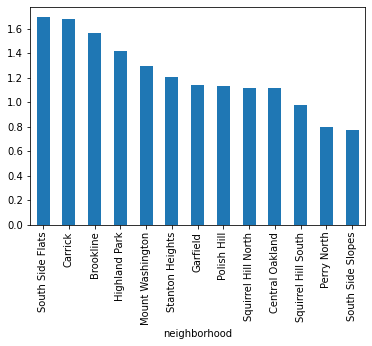

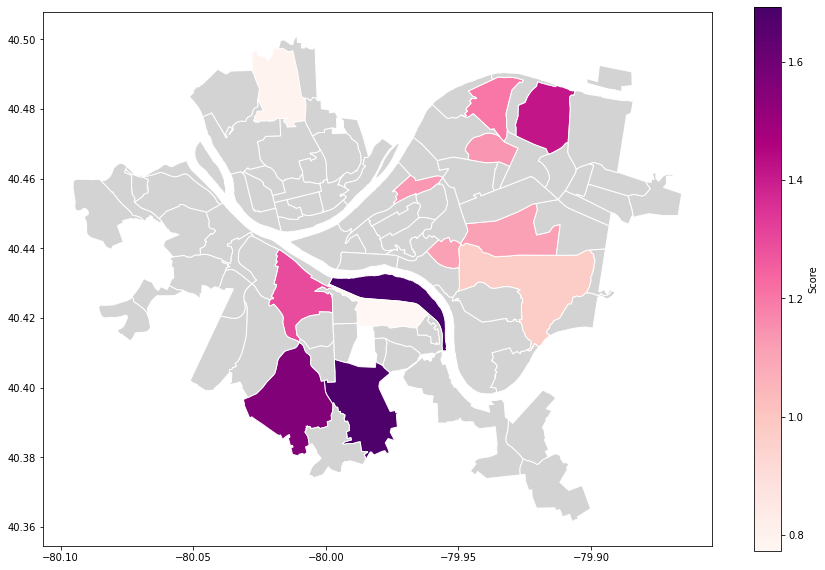

In [85]:
bestNeighborhodDataFrame = pd.DataFrame(list(final.items()))
bestNeighborhodDataFrame = bestNeighborhodDataFrame.rename(columns = {0:'neighborhood', 1:'score'})
bestNeighborhodSeries = bestNeighborhodDataFrame.groupby('neighborhood').sum()['score'].sort_values(ascending=False)
bestNeighborhodSeries.plot(x='Neighborhoods in Pittsburgh', y='Score', kind='bar')
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
bestNeighborhodMap = neighborhoods.merge(bestNeighborhodSeries, how='left', left_on='hood', right_on='neighborhood') 
bestNeighborhodMap.plot(column='score', # set the data to be used for coloring
               cmap='RdPu',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Score"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

With this, we know that South Side Flats is the most alien invasion independent neighborhood! 

## What is the best neighborhood in Pittsburgh?

The most alien invasion independent neighborhood is <b>South Side Flats</b>. With our data analysis of the question, ‘Which neighborhood is the most invariant to an alien invasion?’ we have South Side Flats as the best neighborhood since it scores the highest overall in the metrics that we included of least steps, most speed humps, most playing field area, and most gun seizures. Our metrics of least steps and most speed humps account for running away from the aliens, with the least steps providing humans with less tripping hazards and consumption of energy climbing stairs, and more speed humps potentially slowing down the aliens. The less number of steps doesn’t necessarily mean that it is easier to run away from a potential threat as it might be more dependent on how the neighborhood is structured that allows for more hiding places, and the speed humps dataset was created for encouraging neighborhoods to make more speed humps, so there was some sampling bias there. More playing field areas can correlate with a higher chance of being able to set up camp, however, we only summed the total area, so it could be the case that one neighborhood could score highly with many small playing fields or with few large playing fields, and all would be lost in this data analysis. The gun seizure dataset had more data than the reported gun owners which is why we used it instead, so it doesn’t completely accurately represent the information of how many gun owners there are in each neighborhood to be able to protect ourselves against aliens. With all of these shortcomings of our data sets and metrics, for potential next steps in this project, we might want to calculate similar metrics with more accurate data or potentially gather some data ourselves computationally. 

![image](southsideimage.jpeg)